# 3_ Factor Investing
## The Capital Asset Pricing model

### Excess returns
In order to perform a robust analysis on your portfolio returns, you must first subtract the risk-free rate of return from your portfolio returns. The portfolio return minus the risk-free rate of return is known as the Excess Portfolio Return.

In the United States, the risk-free rate has been close to 0 since the financial crisis (2008), but this step is crucial for other countries with higher risk-free rates such as Venezuela or Brazil.

The FamaFrenchData DataFrame is available in your workspace and contains the proper data for this exercise. The portfolio you will be working with is the equal-weighted portfolio from Chapter 2.

In [1]:
import os

while 'ANALYSIS' not in os.listdir():
    
    os.chdir('..')



In [2]:
from ANALYSIS.f_functions.markowitz_data_creation_cap2 import cap2_data

In [13]:
cla = cap2_data(ruta_cap_data  = 'https://assets.datacamp.com/production/repositories/1546/datasets/85e2663a50d3445cbc2c2d30ac81abbaae6a7f56/EfficientFrontierPortfoliosSlim.csv', 
                ruta_stock_returnm = 'https://assets.datacamp.com/production/repositories/1546/datasets/fb7165b7270a3721f69abf9ff09b85938d9d1068/Big9Returns2017.csv', 
                risk_free = 0,
               numstocks = 9) 

cla.portfolio_return()
cla.portfolio_equally_return()
cla.market_cap_portfol()
cla.sharpe()
cla.MSR()
cla.GMV()
FamaFrenchData = cla.RF()

FamaFrenchData

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T,Portfolio,Portfolio_EW,Portfolio_MCap,Portfolio_MSR,Portfolio_GMV,RF
Date,,,,,,,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521,0.008082,0.007605,0.007132,0.009990,0.007665,0
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811,0.000161,-0.000174,-0.000329,-0.001690,-0.002782,0
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806,0.003448,0.003374,0.003903,-0.002261,0.003048,0
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924,0.004660,0.004458,0.006068,-0.007771,-0.006411,0
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585,-0.001372,-0.001565,-0.000478,-0.004642,-0.004633,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.000000,0.000117,0.001431,-0.006664,-0.003524,-0.005448,0.001717,-0.001409,0.001543,-0.000825,-0.001360,-0.001280,-0.001940,-0.001848,0
2017-12-26,-0.025370,-0.001286,0.000119,-0.000214,-0.004002,0.007190,0.002877,-0.006828,0.003082,-0.003026,-0.002715,-0.004717,-0.000478,-0.000967,0
2017-12-27,0.000176,0.003630,-0.000953,0.003426,0.001869,0.004674,-0.002869,0.009262,-0.004352,0.001581,0.001651,0.001854,-0.000242,-0.000180,0


**HAY QUE COMPROBAR SI EL DATAFRAME QUE ACABAMOS DE CREAR CON LAS FORMULAS DEL CUADERNO 2 ES IGUAL A LA QUE USA ELK TIO EN DATACAMP**

In [14]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']


In [15]:

import matplotlib.pyplot as plt
# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns

,Portfolio,Portfolio_Excess
Date,,
2017-01-03,0.008082,0.008082
2017-01-04,0.008245,0.008245
2017-01-05,0.011721,0.011721
2017-01-06,0.016435,0.016435
2017-01-09,0.015041,0.015041
...,...,...
2017-12-22,0.196400,0.196400
2017-12-26,0.192779,0.192779
2017-12-27,0.194665,0.194665


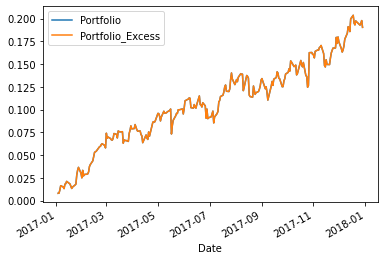

In [16]:
CumulativeReturns.plot()
plt.show()

**Con los datos de Datacamp**

In [22]:
import pandas as pd
FamaFrenchData = pd.DataFrame(pd.read_csv('https://assets.datacamp.com/production/repositories/1546/datasets/3d9b734fea954b629d2477ef48c36525dfecf6e0/FamaFrenchFactors.csv', parse_dates = ['Date']))\
.set_index('Date')
FamaFrenchData

,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.00000
2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.00000
2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.00000
2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.00000
2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.00000
...,...,...,...,...,...,...,...
2017-12-22,-0.001360,-0.0007,-0.0019,-0.0020,-0.0005,0.0021,0.00004
2017-12-26,-0.002715,-0.0007,0.0031,-0.0006,-0.0017,0.0056,0.00004
2017-12-27,0.001651,0.0005,-0.0016,-0.0019,0.0006,-0.0012,0.00004


In [23]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData['Portfolio'] - FamaFrenchData['RF']

import matplotlib.pyplot as plt
# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns

,Portfolio,Portfolio_Excess
Date,,
2013-01-03,-0.005066,-0.005066
2013-01-04,-0.001062,-0.001062
2013-01-07,0.003354,0.003354
2013-01-08,-0.001321,-0.001321
2013-01-09,0.003309,0.003309
...,...,...
2017-12-22,1.628754,1.602355
2017-12-26,1.621618,1.595186
2017-12-27,1.625947,1.599368


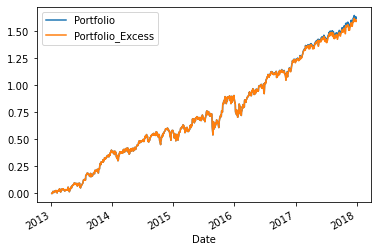

In [24]:
CumulativeReturns.plot()
plt.show()

### Calculating beta using co-variance
Beta is an essential component of many financial models, and is a measure of systematic risk, or exposure to the broad market. In the CAPM model, beta is one of two essential factors.

Historical beta can be estimated in a number of ways. In this exercise, you will use the following simple formula involving co-variance and variance to a benchmark market portfolio.

Generate a co-variance matrix between 'Portfolio_Excess' and 'Market_Excess' columns.

In [25]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

5.726126338154967e-05


Calculate the variance of 'Market_Excess' column.

In [26]:
# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)

5.8803350882118946e-05


Calculate the portfolio beta.




In [27]:

# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient / benchmark_variance
print(portfolio_beta)

0.9737755165745461


**Your portfolio beta is 0.9738. You can think of market beta as a measure of your exposure to the broad stock market. For every 1.0% rise (or fall) in the market, you can expect your portfolio to rise (fall) roughly 0.97%.**

#### Calculating beta with CAPM
There are many ways to model stock returns, but the Capital Asset Pricing Model, or CAPM, is one the most well known:

```
E(Rp) - RF = Bp (E(Rm)- RF)

```

In [28]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# Fit the regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

0.7942627160017839


In [29]:
# Extract the beta
regression_beta = CAPM_fit.params['Market_Excess']
print(regression_beta)

0.973775516574546


**Your portfolio beta is once again 0.9738. The adjusted r-squared is 0.7943. A high adjusted r-squared (close to 1) means that the majority of your portfolio's movements can be explained by the factors in your model.**

Si lanzas varios modelos para testear tus quedate con el que **mayor r-squared ajusted** tenga

## Alpha and multi-factor models


### The Fama French 3-factor model
The Fama-French model famously adds two additional factors to the CAPM model to describe asset returns



In [30]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(regression_adj_rsq)

0.8193910088585152


**The Fama-French 3 factor model fit well, raising the adjusted r-squared from 0.7943 to 0.8194, meaning that the model explains more of your portfolio variance. But there's still room for improvement...**

### p-values and coefficients
You can use the .pvalues attribute on a fitted smf.ols regression model to retrieve the p-values for each coefficient.

Normally, p-values less than 0.05 are considered statistically significant.

Coefficients can be extracted from the fitted regression object using the .params attribute.

In this example, a statistically significant negative SMB ('Small Minus Big') coefficient would signify a factor exposure to large cap stocks, while a positive coefficient would signify an exposure to small cap stocks.

The fitted regression model FamaFrench_fit from the previous exercise is available in your workspace.

In [31]:
# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.2621515274319264  and is  significant


**Your portfolio has a statistically significant negative exposure (-0.2621) to small-cap stocks - in other words - positive exposure to large caps!**

### The efficient market and alpha
The alpha () left over by the regression is unexplained performance due to unknown factors. In a regression model, this is simply the coefficient of the intercept.

There are two general schools of thought as to why:

1. The model simply needs to be expanded. When you have found all of the missing economic factors, you can explain all stock and portfolio returns. This is known as the Efficient Market Hypothesis.
2. 
There is a degree of unexplainable performance that no model will ever capture reliably. Perhaps it is due to skill, timing, intuition or luck, but investors should seek to maximize their alpha.
Your fitted regression analysis from the previous exercise has been stored in FamaFrench_fit

In [32]:
# Extract your portfolio alpha
portfolio_alpha = FamaFrench_fit.params['Intercept']
print(portfolio_alpha)


0.00018326665203183067


In [33]:
# Annualize your portfolio alpha
portfolio_alpha_annualized = ((1+portfolio_alpha)**252)-1
print(portfolio_alpha_annualized)

0.04726181730280854


## Expanding the 3-factor model
 

### The 5-factor model
In 2015, Fama and French extended their previous 3-factor model, adding two additional factors:

RMW: Profitability
CMA: Investment
The RMW factor represents the returns of companies with high operating profitability versus those with low operating profitability, and the CMA factor represents the returns of companies with aggressive investments versus those who are more conservative.

The FamaFrenchData object is available in your workspace and contains the RMW and CMA factors in addition to the previous factors.

In [34]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA', data=FamaFrenchData)

# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench5_fit.rsquared_adj
print(regression_adj_rsq)

0.8367245019225793


**The adjusted r-squared is even higher at 0.8367! Could you build a better model?**